# Approaching interpolation and derivation

## Initialization

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.interpolate as spi
import tailor
from tailor import clustering as cl

In [2]:
series_a = pd.Series([0,3,8,12,8,3,1], [1,2,3,4,5,6,10])

In [3]:
series_b = pd.Series([2,24,3,2,1.5,1], [1,4,6,8,9,10])

## Experimenting with differences

The following code is to check how differences and means are calculated when certain indexes are missing/not all data-points are filled in both Series

In [4]:
series_a - series_b

1     -2.0
2      NaN
3      NaN
4    -12.0
5      NaN
6      0.0
8      NaN
9      NaN
10     0.0
dtype: float64

In [5]:
abs(series_a - series_b)

1      2.0
2      NaN
3      NaN
4     12.0
5      NaN
6      0.0
8      NaN
9      NaN
10     0.0
dtype: float64

In [6]:
abs(series_a - series_b).sum()

14.0

In [7]:
abs(series_a - series_b).mean()

3.5

## Experimenting with interpolation and derivation

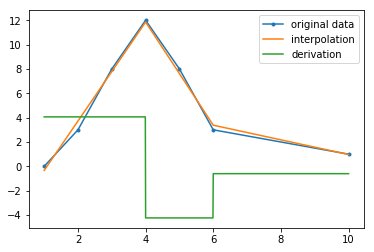

In [8]:
# generate the function
f = cl.interpolate_function(series_a)
# generate fine resolution x axis
xf = np.linspace(series_a.index.min(), series_a.index.max(), 1000)
# generate fine resolution y values
yf = f(xf)
# generate derivative function
df = f.derivative()
# generate fine resolution derivative y values
ydf = df(xf)
# plot original data-points
pod, = plt.plot(series_a.index, series_a.values, '.-', label='original data')
# plot interpolated function
pif, = plt.plot(xf, yf, label='interpolation')
# plot derivative function
pdf, = plt.plot(xf, ydf, label='derivation')
plt.legend(handles=[pod, pif, pdf])

In [9]:
%%time
cl.absolute(series_a,series_b)

CPU times: user 2.18 ms, sys: 800 µs, total: 2.98 ms
Wall time: 1.5 ms


3.5

In [10]:
%%time
cl.derivative(series_a,series_b, degree=1, smooth=2)

CPU times: user 0 ns, sys: 4.62 ms, total: 4.62 ms
Wall time: 2.48 ms


2.368871695340034

## Distance and curve comparison

In [11]:
print("Base: ")
print("Absolute distance: " + np.str(cl.absolute(series_a, series_b)))
print(" ")
print("Interpolation and derivation: ")
print("Degree 1 distance: " + np.str(cl.derivative(series_a,series_b, degree=1, smooth=2)))
print("Degree 2 distance: " + np.str(cl.derivative(series_a,series_b, degree=2, smooth=2)))
print("Degree 3 distance: " + np.str(cl.derivative(series_a,series_b, degree=3, smooth=2)))
print("Degree 4 distance: " + np.str(cl.derivative(series_a,series_b, degree=4, smooth=2)))
print("Degree 5 distance: " + np.str(cl.derivative(series_a,series_b, degree=5, smooth=2)))

Base: 
Absolute distance: 3.5
 
Interpolation and derivation: 
Degree 1 distance: 2.368871695340034
Degree 2 distance: 7.446037459423405
Degree 3 distance: 14.111168716320599
Degree 4 distance: 21.643760008735864
Degree 5 distance: 24.085393862843205


The derivate of the interpolation with degree=1 gives the best results and is better than the base distance measurement. Interpolation with higher degrees results in distorted curves and performs worse than the base measure. In the following subsections each degree can be viewed in detail.

### Degree 1

In [12]:
%%time

# generate the functions
f1 = cl.interpolate_function(series_a, degree=1, smooth=2)
f2 = cl.interpolate_function(series_b, degree=1, smooth=2)

CPU times: user 1.1 ms, sys: 433 µs, total: 1.53 ms
Wall time: 1.29 ms


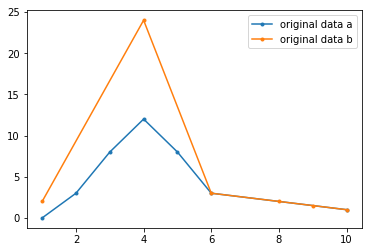

In [13]:
# generate fine resolution x axis
xf = np.linspace(min(series_a.index.min(), series_b.index.min()), max(series_a.index.max(), series_b.index.max()), 1000)
# generate fine resolution y values
yf1 = f1(xf)
yf2 = f2(xf)
# generate derivative function
df1 = f1.derivative()
df2 = f2.derivative()
# generate fine resolution derivative y values
ydf1 = df1(xf)
ydf2 = df2(xf)
# plot original data-points
pod1, = plt.plot(series_a.index, series_a.values, '.-', label='original data a')
pod2, = plt.plot(series_b.index, series_b.values, '.-', label='original data b')
plt.legend(handles=[pod1, pod2])

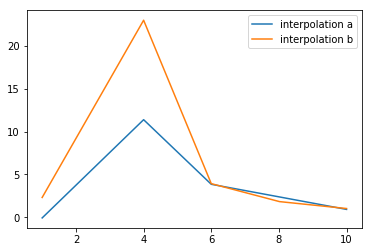

In [14]:
# plot interpolated function
pif1, = plt.plot(xf, yf1, label='interpolation a')
pif2, = plt.plot(xf, yf2, label='interpolation b')
plt.legend(handles=[pif1, pif2])

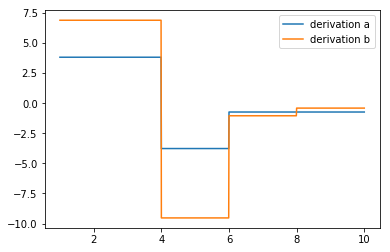

In [15]:
# plot derivative function
pdf1, = plt.plot(xf, ydf1, label='derivation a')
pdf2, = plt.plot(xf, ydf2, label='derivation b')
plt.legend(handles=[pdf1, pdf2])

### Degree 2 

In [16]:
%%time

# generate the functions
f1 = cl.interpolate_function(series_a, degree=2, smooth=2)
f2 = cl.interpolate_function(series_b, degree=2, smooth=2)

CPU times: user 1.17 ms, sys: 726 µs, total: 1.9 ms
Wall time: 713 µs


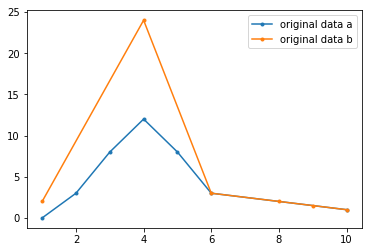

In [17]:
# generate fine resolution x axis
xf = np.linspace(min(series_a.index.min(), series_b.index.min()), max(series_a.index.max(), series_b.index.max()), 1000)
# generate fine resolution y values
yf1 = f1(xf)
yf2 = f2(xf)
# generate derivative function
df1 = f1.derivative()
df2 = f2.derivative()
# generate fine resolution derivative y values
ydf1 = df1(xf)
ydf2 = df2(xf)
# plot original data-points
pod1, = plt.plot(series_a.index, series_a.values, '.-', label='original data a')
pod2, = plt.plot(series_b.index, series_b.values, '.-', label='original data b')
plt.legend(handles=[pod1, pod2])

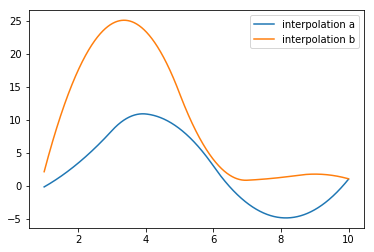

In [18]:
# plot interpolated function
pif1, = plt.plot(xf, yf1, label='interpolation a')
pif2, = plt.plot(xf, yf2, label='interpolation b')
plt.legend(handles=[pif1, pif2])

In [ ]:
# plot derivative function
pdf1, = plt.plot(xf, ydf1, label='derivation a')
pdf2, = plt.plot(xf, ydf2, label='derivation b')
plt.legend(handles=[pdf1, pdf2])

### Degree 3

In [ ]:
%%time

# generate the functions
f1 = cl.interpolate_function(series_a, degree=3, smooth=2)
f2 = cl.interpolate_function(series_b, degree=3, smooth=2)

In [ ]:
# generate fine resolution x axis
xf = np.linspace(min(series_a.index.min(), series_b.index.min()), max(series_a.index.max(), series_b.index.max()), 1000)
# generate fine resolution y values
yf1 = f1(xf)
yf2 = f2(xf)
# generate derivative function
df1 = f1.derivative()
df2 = f2.derivative()
# generate fine resolution derivative y values
ydf1 = df1(xf)
ydf2 = df2(xf)
# plot original data-points
pod1, = plt.plot(series_a.index, series_a.values, '.-', label='original data a')
pod2, = plt.plot(series_b.index, series_b.values, '.-', label='original data b')
plt.legend(handles=[pod1, pod2])

In [ ]:
# plot interpolated function
pif1, = plt.plot(xf, yf1, label='interpolation a')
pif2, = plt.plot(xf, yf2, label='interpolation b')
plt.legend(handles=[pif1, pif2])

In [ ]:
# plot derivative function
pdf1, = plt.plot(xf, ydf1, label='derivation a')
pdf2, = plt.plot(xf, ydf2, label='derivation b')
plt.legend(handles=[pdf1, pdf2])

### Degree 4

In [ ]:
%%time 

# generate the functions
f1 = cl.interpolate_function(series_a, degree=4, smooth=2)
f2 = cl.interpolate_function(series_b, degree=4, smooth=2)

In [ ]:
# generate fine resolution x axis
xf = np.linspace(min(series_a.index.min(), series_b.index.min()), max(series_a.index.max(), series_b.index.max()), 1000)
# generate fine resolution y values
yf1 = f1(xf)
yf2 = f2(xf)
# generate derivative function
df1 = f1.derivative()
df2 = f2.derivative()
# generate fine resolution derivative y values
ydf1 = df1(xf)
ydf2 = df2(xf)
# plot original data-points
pod1, = plt.plot(series_a.index, series_a.values, '.-', label='original data a')
pod2, = plt.plot(series_b.index, series_b.values, '.-', label='original data b')
plt.legend(handles=[pod1, pod2])

In [ ]:
# plot interpolated function
pif1, = plt.plot(xf, yf1, label='interpolation a')
pif2, = plt.plot(xf, yf2, label='interpolation b')
plt.legend(handles=[pif1, pif2])

In [ ]:
# plot derivative function
pdf1, = plt.plot(xf, ydf1, label='derivation a')
pdf2, = plt.plot(xf, ydf2, label='derivation b')
plt.legend(handles=[pdf1, pdf2])

### Degree 5

In [ ]:
%%time 

# generate the functions
f1 = cl.interpolate_function(series_a, degree=5, smooth=2)
f2 = cl.interpolate_function(series_b, degree=5, smooth=2)

In [ ]:
# generate fine resolution x axis
xf = np.linspace(min(series_a.index.min(), series_b.index.min()), max(series_a.index.max(), series_b.index.max()), 1000)
# generate fine resolution y values
yf1 = f1(xf)
yf2 = f2(xf)
# generate derivative function
df1 = f1.derivative()
df2 = f2.derivative()
# generate fine resolution derivative y values
ydf1 = df1(xf)
ydf2 = df2(xf)
# plot original data-points
pod1, = plt.plot(series_a.index, series_a.values, '.-', label='original data a')
pod2, = plt.plot(series_b.index, series_b.values, '.-', label='original data b')
plt.legend(handles=[pod1, pod2])

In [ ]:
# plot interpolated function
pif1, = plt.plot(xf, yf1, label='interpolation a')
pif2, = plt.plot(xf, yf2, label='interpolation b')
plt.legend(handles=[pif1, pif2])

In [ ]:
# plot derivative function
pdf1, = plt.plot(xf, ydf1, label='derivation a')
pdf2, = plt.plot(xf, ydf2, label='derivation b')
plt.legend(handles=[pdf1, pdf2])